In [1]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


### Nombre: Ana Sofia Del Rio

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error absoluto asociado a $f'(x)$ en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [50]:
#Punto a
#Definimos la función
def derivada(f,x, tol = 1e-8):
  '''
  Encuentra el valor de la derivada de una función en un punto dado, usando
  el método de diferencias finitas centrales

  Entradas:
  f: función (callable)
  x: punto a evaluar
  tol: tolerancia

  Salidas:
  valor_derivada: el valor de la derivada en ese punto
  h_valores: los valores del paso
  '''
  h = 0.1
  h_valores = []
  der_anterior = 0
  der_nueva = (f(x+h)-f(x-h))/(2*h)

  while abs(der_anterior - der_nueva) > tol:
    h= (h / 2)
    h_valores.append(h)
    der_anterior= der_nueva

    der_nueva=(f(x+h)-f(x-h))/(2*h)
    err=abs(der_nueva-der_anterior)

  valor_derivada= der_nueva
  return valor_derivada, h_valores

In [51]:
#Encontramos f'(x=2)
f = lambda x: 3**x
x = 2
f_prime, h_ = derivada(f, x)
print(f'El valor de la derivada es {f_prime}')
print(f'Y los valores de h son {h_} ')

El valor de la derivada es 9.88751059921924
Y los valores de h son [0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125, 0.000390625, 0.0001953125, 9.765625e-05, 4.8828125e-05, 2.44140625e-05] 


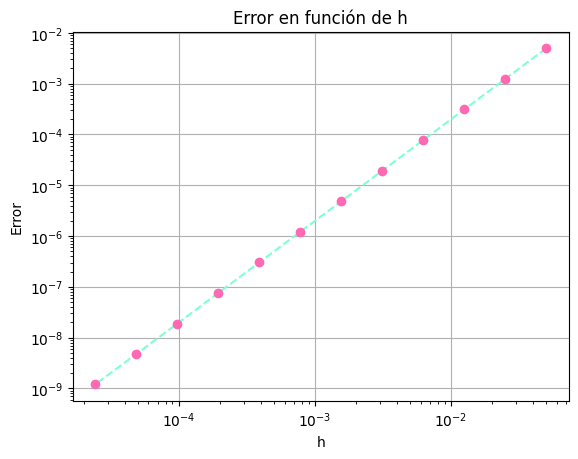

In [52]:
#Punto b
error = [abs (((3**2)*(np.log(3)))-(f(2+h)-f(2-h))/(2*h)) for h in h_]

plt.loglog(h_, error,'--',color='aquamarine')
plt.plot(h_,error, 'o', color='hotpink')
plt.title('Error en función de h')
plt.xlabel('h')
plt.ylabel('Error')
plt.grid()
plt.show()


## 2

**(40 puntos)** Considere un fluido viscoso que fluye en régimen laminar a través de una tubería cilíndrica horizontal de radio $R = 1.0\ \text{cm}$. Se ha medido experimentalmente la velocidad axial del fluido en distintos radios desde el centro de la tubería ($r = 0$) hasta la pared ($r = R$). Los datos obtenidos son:

| $r$ (cm) | $v(r)$ (cm/s) |
|----------|---------------|
| 0.0      | 2.00          |
| 0.2      | 1.92          |
| 0.4      | 1.68          |
| 0.6      | 1.28          |
| 0.8      | 0.72          |
| 1.0      | 0.00          |

Con base en estos datos responda:

---

**a.** Encuentre una expresión para el polinomio interpolador de **Lagrange** para $v(r)$.

---

**b.** Usando las funciones obtenidas por **Lagrange** y **CubicSpline**, haga un gráfico donde se muestre el comportamiento de ambas interpolaciones, comparándolas con los datos experimentales.

---

**c.** Calcule la derivada $\frac{dv}{dr}$, correspondiente al **gradiente de velocidad radial** usando los datos procedentes de la interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

**d.** Determine el **esfuerzo cortante** en el fluido, dado por:

$$
\tau(r) = \mu \frac{dv}{dr},
$$

donde $\mu = 0.001\ \text{Pa}\cdot\text{s}$ es la viscosidad dinámica del fluido. Grafique $\tau(r)$ para $r \in [0, 1]$.

---



El polinomio de interpolación de Lagrange para v(r) es:
         5         4         3         2
-6.349 x + 17.78 x - 18.03 x + 5.822 x - 1.219 x + 2


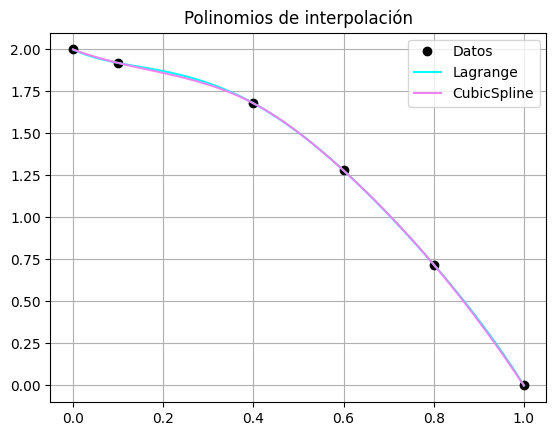

In [53]:
#Datos
r = np.array([0.0, 0.1, 0.4, 0.6, 0.8, 1.0])
v_r = np.array([2.00, 1.92, 1.68, 1.28, 0.72, 0.00])

#Punto a

#Polinomio de Lagrange
p_l = lagrange(r, v_r)
print(f'El polinomio de interpolación de Lagrange para v(r) es:\n {p_l}')

#CubicSpline
p_cs = CubicSpline(r, v_r)

#Punto b
x_interp = np.linspace(min(r), max(r), 100)

plt.plot(r, v_r, 'o', label='Datos', color = 'black')
plt.plot(x_interp, p_l(x_interp), label='Lagrange', color ='cyan')
plt.plot(x_interp, p_cs(x_interp), label='CubicSpline', color ='violet')
plt.title('Polinomios de interpolación')
plt.legend()
plt.grid()
plt.show()


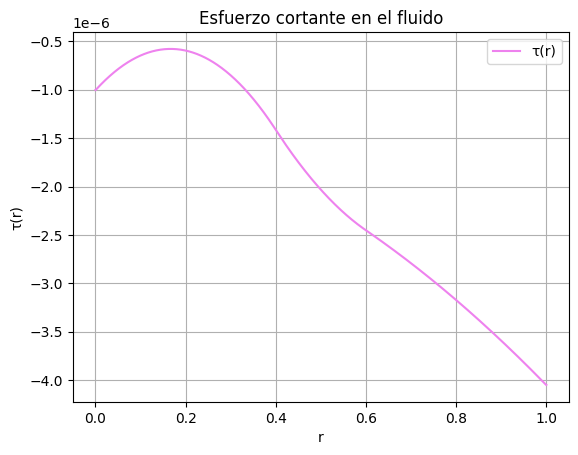

In [63]:
#Punto c
h = 10e-4
x = np.arange(0, 1+h, h)
f = p_cs(x)

gradiente_vradial= np.gradient(f)

#Punto d
mu = 0.001
esf_cort = mu * gradiente_vradial

plt.plot(x, esf_cort, label= 'τ(r)', color = 'violet' )
plt.title('Esfuerzo cortante en el fluido')
plt.xlabel('r')
plt.ylabel('τ(r)')
plt.legend()
plt.grid()
plt.show()

# 3

**(30 puntos)** Considere un sólido tetraédrico $R$ delimitado por los planos:

- $x = 0$, $y = 0$, $z = 0$,  
- y el plano $x + y + z = 1$.

Este sólido ocupa una región en el primer octante y está contenido completamente dentro del cubo unidad.

La densidad del sólido es variable y está dada por $\rho(x, y, z) = xyz$ [kg/m³].

Considere:


$$
\iiint_R f(x,y,z)\, dV = \int_0^1 \int_0^{1-x} \int_0^{1-x-y} f(x,y,z)\, dz\, dy\, dx
$$

con

$$
dV = dz\,dy\,dx
$$

---

a. Calcule la **masa total** del sólido:

$$
m = \iiint_R \rho(x, y, z)\, dV.
$$

Usando la forma iterativa de `quad`, compare su resultado con `tplquad`.

---

b. Calcule el **momento de inercia respecto a los ejes $x$ y $z$**, definidos como:

$$
I_z = \iiint_R (x^2 + y^2)\, \rho(x, y, z)\, dV.
$$

$$
I_x = \iiint_R (y^2 + z^2)\, \rho(x, y, z)\, dV.
$$

Puede usar la forma iterativa de `quad` o `tplquad`.





In [6]:
#Punto a

#Usando quad iterativamente
def integral_externa(y, x):
  '''
  Calcula la integral más externa de una integral triple
  '''
  integrando = lambda z: x * y * z
  resultado, _ = quad(integrando, 0, 1- x- y)
  return resultado

def integral_intermedia(x):
  '''
  Calcula la integral más intermedia de una integral triple
  '''
  integrando = lambda y: integral_externa(y, x)
  resultado, _ = quad(integrando, 0, 1- x)
  return resultado

resultado_int_quad, _ = quad(integral_intermedia, 0, 1)
print(f'El resultado de la integral usando el método de quad es {resultado_int_quad}')

#Usando tplquad
f_triple = lambda z, y, x: x * y * z
resultado_int_tplquad, _ = tplquad(f_triple, 0, 1, lambda x: 0, lambda x: 1- x, lambda x, y: 0, lambda x,y: 1-x-y )
print(f'El resultado de la integral usando el método de tlpquad ees {resultado_int_tplquad}')
error = abs(resultado_int_quad - resultado_int_tplquad)
print(f'El error es {error}')

El resultado de la integral usando el método de quad es 0.001388888888888889
El resultado de la integral usando el método de tlpquad ees 0.001388888888888889
El error es 0.0


In [12]:
#Punto B
#Usando tplquad
f_z = lambda z, y, x: ( (x**2) + (y**2))* (x * y *z)
I_z, _ = tplquad(f_z, 0, 1, lambda x: 0, lambda x: 1- x, lambda x, y: 0, lambda x,y: 1-x-y)
print(f'El momento de inercia respecto al eje z usando el método de tlpquad es {I_z}')

f_x = lambda z, y, x: ( (y**2) + (z**2))* (x * y *z)
I_x, _ = tplquad(f_x, 0, 1, lambda x: 0, lambda x: 1- x, lambda x, y: 0, lambda x,y: 1-x-y)
print(f'El momento de inercia respecto al eje x usando el método de tlpquad es {I_x}')

El momento de inercia respecto al eje z usando el método de tlpquad es 0.00029761904761904765
El momento de inercia respecto al eje x usando el método de tlpquad es 0.00029761904761904765
